In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace= True)

In [15]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


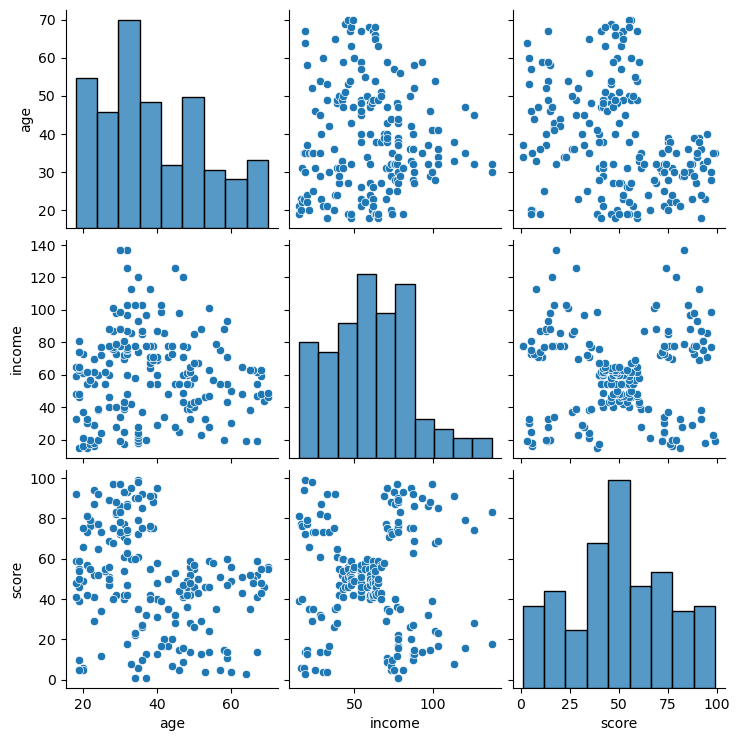

In [18]:
seaborn.pairplot(df[['age','income','score']])

In [19]:
import sklearn.cluster as cluster

In [20]:
kmean=cluster.KMeans(n_clusters=5)

In [25]:
kmean=kmean.fit(df[['income','score']])

In [26]:
kmean.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [28]:
df['income_clusters']=kmean.labels_

In [29]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [31]:
df['income_clusters'].value_counts()

1    81
0    39
2    35
3    23
4    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

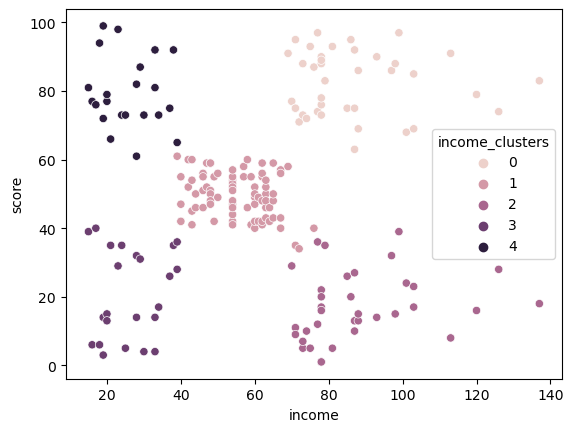

In [32]:
seaborn.scatterplot(x='income',y='score',hue='income_clusters',data=df)

In [33]:
kmean=cluster.KMeans(n_clusters=2)

In [34]:
kmean=kmean.fit(df[['score','age']])

In [35]:
kmean.cluster_centers_

array([[32.88695652, 46.16521739],
       [73.62352941, 28.95294118]])

In [36]:
df['income_clusters']=kmean.labels_

In [37]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [38]:
df['income_clusters'].value_counts()

0    115
1     85
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

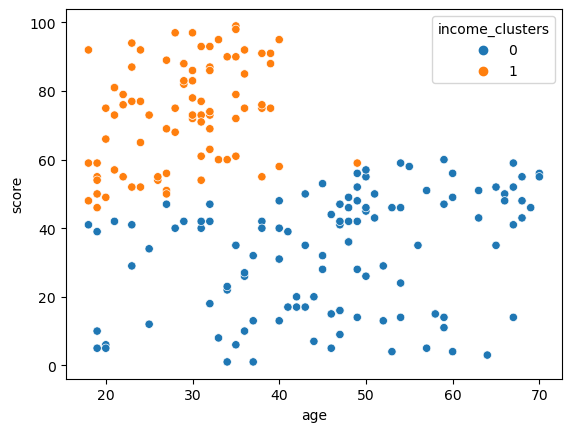

In [39]:
seaborn.scatterplot(x='age',y='score',hue='income_clusters',data=df)